In [22]:
import pandas as pd
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load database and fetch Online_Transactions table
db_path = '/content/Retail.db'
conn = sqlite3.connect(db_path)

# Load Online_Transactions into a DataFrame
query_online_transactions = "SELECT * FROM Online_Transactions;"
online_transactions_df = pd.read_sql_query(query_online_transactions, conn)



# 1. Revenue Analysis (Top Categories/Products by Revenue)

In [24]:
#Top categories by revenue
top_categories_revenue = (
    online_transactions_df.groupby("ProductCategory")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
print(top_categories_revenue.head(5))

# Top products by revenue
top_products_revenue = (
    online_transactions_df.groupby("ProductName")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)
print(top_products_revenue.head(10))

#Analysis of top revenue products
online = online_transactions_df

onlineRevSum = online.groupby("ProductSKU")["Revenue"].sum().reset_index()

onlineTotalRev = online["Revenue"].sum()

top10p = onlineRevSum.sort_values(by = "Revenue", ascending = False)[:10]["Revenue"].sum()/onlineTotalRev
print ("Top 10 products make up", top10p*100, "% of revenue")
top50p = onlineRevSum.sort_values(by = "Revenue", ascending = False)[:50]["Revenue"].sum()/onlineTotalRev
print ("Top 50 products make up", top50p*100, "% of revenue")

  ProductCategory     Revenue
0         Apparel  4744689.64
1        Nest-USA  3793535.40
2          Office  1635089.88
3       Drinkware   907749.68
4       Lifestyle   861527.80
                                         ProductName    Revenue
0            Nest® Cam Outdoor Security Camera - USA  946565.04
1  Nest® Learning Thermostat 3rd Gen-USA - Stainl...  901061.17
2             Nest® Cam Indoor Security Camera - USA  781774.80
3                                  Google Sunglasses  430034.41
4   Nest® Protect Smoke + CO White Battery Alarm-USA  398795.86
5     Nest® Protect Smoke + CO White Wired Alarm-USA  349406.32
6      Nest® Learning Thermostat 3rd Gen-USA - White  300310.17
7                          Google 22 oz Water Bottle  287238.14
8       Nest® Secure Alarm System Starter Pack - USA  262515.34
9                                 Nest® Cam IQ - USA  241366.71
Top 10 products make up 30.202755656764037 % of revenue
Top 50 products make up 51.23225207612909 % of revenue


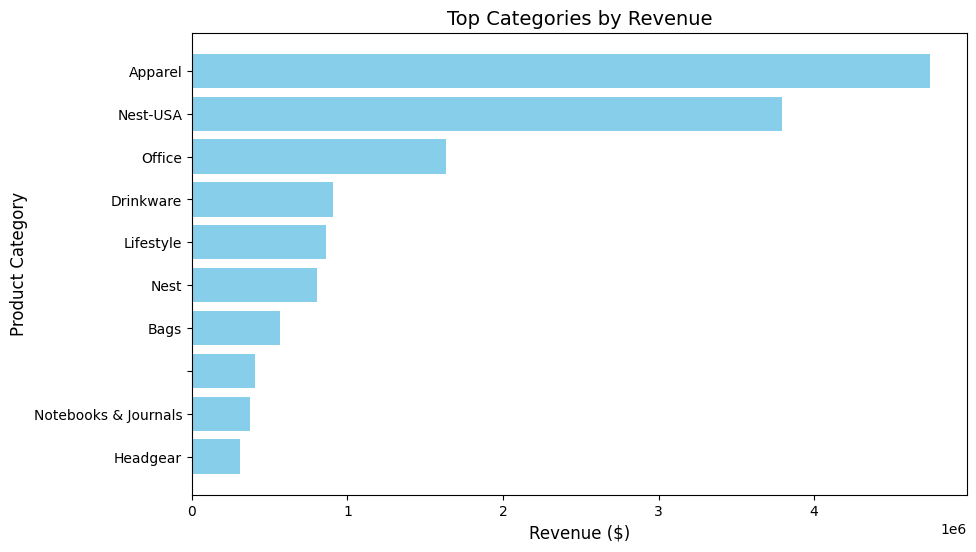

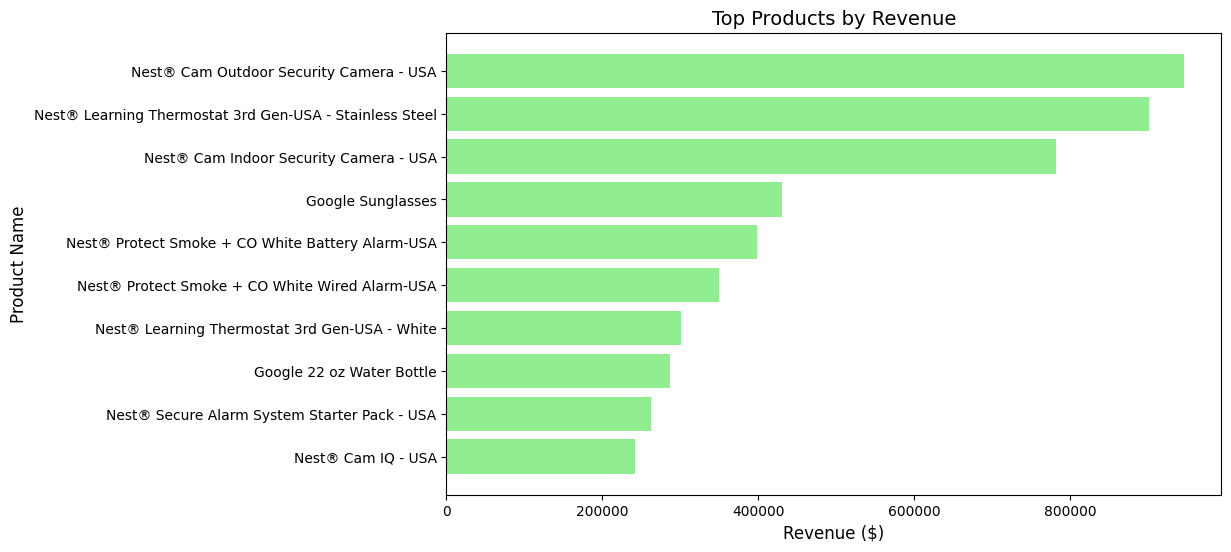

In [25]:
# Visualization for Top Categories by Revenue
plt.figure(figsize=(10, 6))
plt.barh(top_categories_revenue["ProductCategory"], top_categories_revenue["Revenue"], color="skyblue")
plt.xlabel("Revenue ($)", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.title("Top Categories by Revenue", fontsize=14)
plt.gca().invert_yaxis()
plt.show()

# Visualization for Top Products by Revenue
plt.figure(figsize=(10, 6))
plt.barh(top_products_revenue["ProductName"], top_products_revenue["Revenue"], color="lightgreen")
plt.xlabel("Revenue ($)", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.title("Top Products by Revenue", fontsize=14)
plt.gca().invert_yaxis()
plt.show()


# 2. Sales Trends Over Time

---



In [26]:
# Convert TransactionDate to datetime
online_transactions_df["TransactionDate"] = pd.to_datetime(online_transactions_df["TransactionDate"])

# Aggregate revenue by month
sales_trends = (
    online_transactions_df.groupby(online_transactions_df["TransactionDate"].dt.to_period("M"))["Revenue"]
    .sum()
    .reset_index()
)
sales_trends["TransactionDate"] = sales_trends["TransactionDate"].astype(str)

print(sales_trends)


   TransactionDate     Revenue
0          2017-01  1110510.46
1          2017-02  1119781.36
2          2017-03  1099786.54
3          2017-04  2002337.72
4          2017-05  1039479.29
5          2017-06   903262.16
6          2017-07  1671340.07
7          2017-08  1417720.07
8          2017-09  1450456.42
9          2017-10   971099.11
10         2017-11  1032774.82
11         2017-12  1085395.22


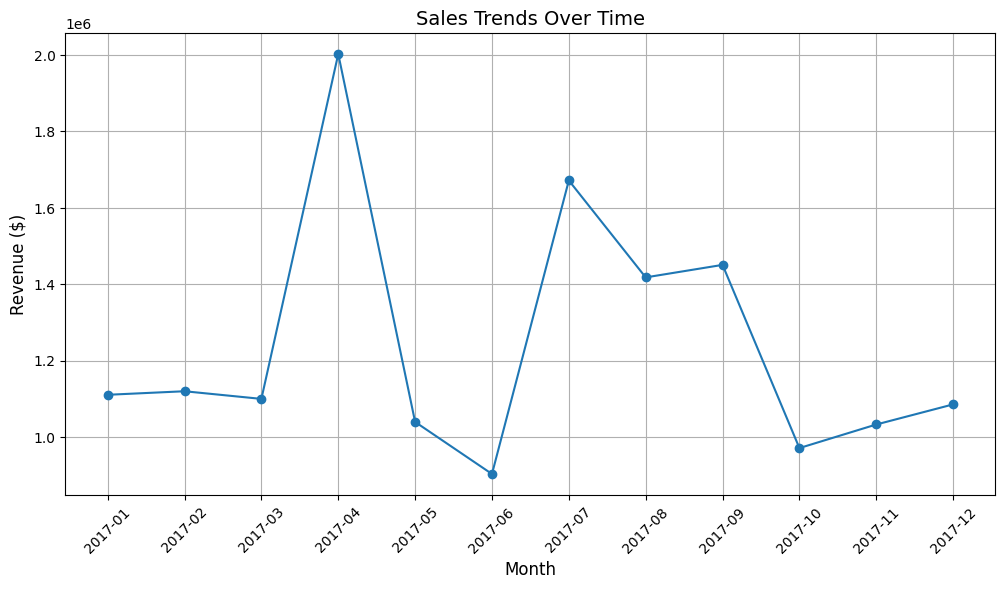

In [27]:
# Plot sales trends
plt.figure(figsize=(12, 6))
plt.plot(sales_trends["TransactionDate"], sales_trends["Revenue"], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)
plt.title("Sales Trends Over Time", fontsize=14)
plt.grid()
plt.show()

# 3. Tax and Delivery Cost Impact

In [28]:
# Calculate percentage impact of Tax and Delivery on Revenue
online_transactions_df["Tax_Impact"] = (online_transactions_df["Tax"] / online_transactions_df["Revenue"]) * 100
online_transactions_df["Delivery_Impact"] = (online_transactions_df["Delivery"] / online_transactions_df["Revenue"]) * 100

# Average tax and delivery cost impact by category
impact_by_category = online_transactions_df.groupby("ProductCategory")[["Tax_Impact", "Delivery_Impact"]].mean().reset_index()
print(impact_by_category)




         ProductCategory  Tax_Impact  Delivery_Impact
0                           6.491766        17.500763
1            Accessories    7.516364        19.245548
2                Android    6.756413        11.720497
3                Apparel    6.871894        15.570569
4              Backpacks    6.025465         8.706917
5                   Bags    6.667441        11.833266
6                Bottles    6.615337        25.492618
7              Drinkware    6.482980        16.841420
8                    Fun    7.140272        17.426229
9             Gift Cards    0.443019         0.000000
10                Google    7.888964        14.361466
11              Headgear    6.665737        15.470771
12            Housewares    6.485869        14.688097
13             Lifestyle    6.837798        18.691026
14             More Bags    6.555101        10.303083
15                  Nest    7.122012         3.339369
16           Nest-Canada   12.892236         3.868857
17              Nest-USA    

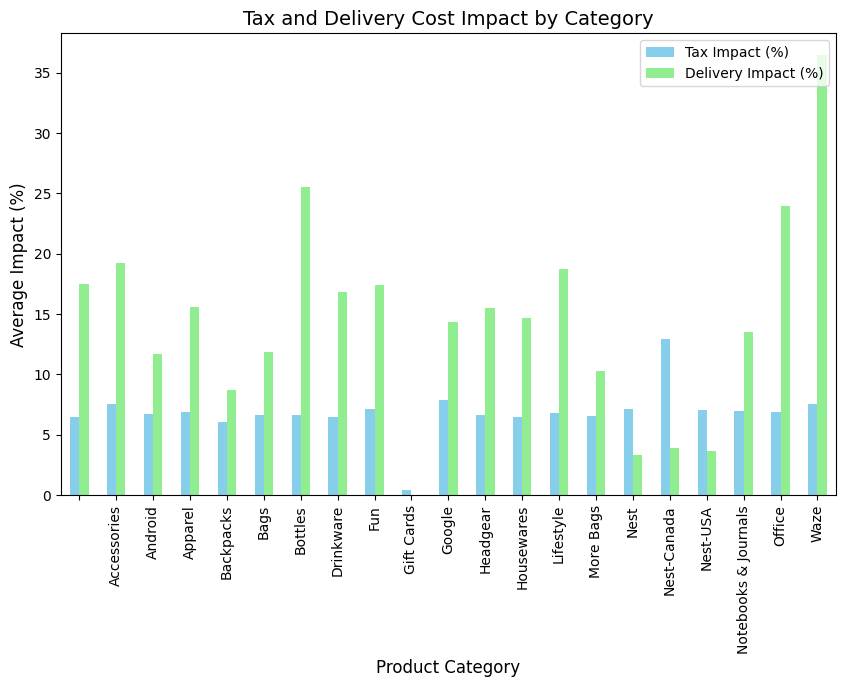

In [29]:
# Plot tax and delivery impact
impact_by_category.set_index("ProductCategory").plot(
    kind="bar", figsize=(10, 6), color=["skyblue", "lightgreen"]
)
plt.xlabel("Product Category", fontsize=12)
plt.ylabel("Average Impact (%)", fontsize=12)
plt.title("Tax and Delivery Cost Impact by Category", fontsize=14)
plt.legend(["Tax Impact (%)", "Delivery Impact (%)"], loc="upper right")
plt.show()

#4. Profitability Analysis

In [30]:
# Calculate profitability
online_transactions_df["Profit"] = (
    online_transactions_df["Revenue"] - online_transactions_df["Tax"] - online_transactions_df["Delivery"]
)

# Aggregate profit by category
profit_by_category = (
    online_transactions_df.groupby("ProductCategory")["Profit"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Print results
print("Profitability by Product Category:")
print(profit_by_category)



Profitability by Product Category:
         ProductCategory      Profit
0                Apparel  4377811.39
1               Nest-USA  3429100.31
2                 Office  1450888.15
3              Drinkware   808327.42
4              Lifestyle   773852.22
5                   Nest   731961.36
6                   Bags   512101.31
7                          369013.42
8   Notebooks & Journals   344167.85
9               Headgear   292297.49
10                   Fun   104455.00
11           Nest-Canada    87670.02
12                  Waze    50794.96
13           Accessories    45009.17
14               Bottles    34523.60
15            Housewares    33009.05
16                Google    26619.79
17             Backpacks    21312.16
18            Gift Cards    19685.73
19             More Bags    16718.03
20               Android     4137.60


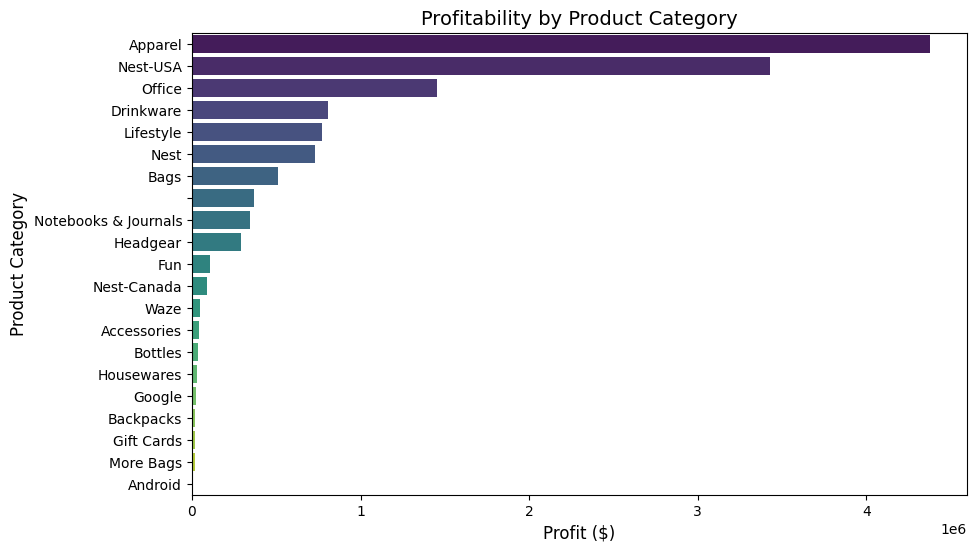

In [31]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Profit",
    y="ProductCategory",
    data=profit_by_category,
    palette="viridis",
    hue="ProductCategory",
    dodge=False  # Ensures single bars per category
)
plt.legend([],[], frameon=False)  # Suppress the legend
plt.xlabel("Profit ($)", fontsize=12)
plt.ylabel("Product Category", fontsize=12)
plt.title("Profitability by Product Category", fontsize=14)
plt.show()


#5.High-Tax Impact Products


In [32]:
# Calculate tax percentage
online_transactions_df["Tax_Percentage"] = (online_transactions_df["Tax"] / online_transactions_df["Revenue"]) * 100

# Top products by tax percentage
high_tax_products = (
    online_transactions_df.groupby("ProductName")["Tax_Percentage"]
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

# Print results
print("Top 10 Products by Tax Percentage:")
print(high_tax_products)

Top 10 Products by Tax Percentage:
                                         ProductName  Tax_Percentage
0                Compact Journal with Recycled Pages       19.142857
1                           Nest®  Thermostat E - CA       13.719642
2                                  Nest® Cam IQ - CA       13.302867
3  Nest® Learning Thermostat 3rd Gen - CA - Stain...       13.097703
4  Nest® Protect Smoke + CO White Battery Alarm - CA       13.084228
5              Nest® Cam Indoor Security Camera - CA       12.773800
6    Nest® Protect Smoke + CO White Wired Alarm - CA       12.686348
7             Nest® Cam Outdoor Security Camera - CA       12.659694
8                                     Google Tee Red       10.725492
9                             YouTube Kids Tee Black       10.648578


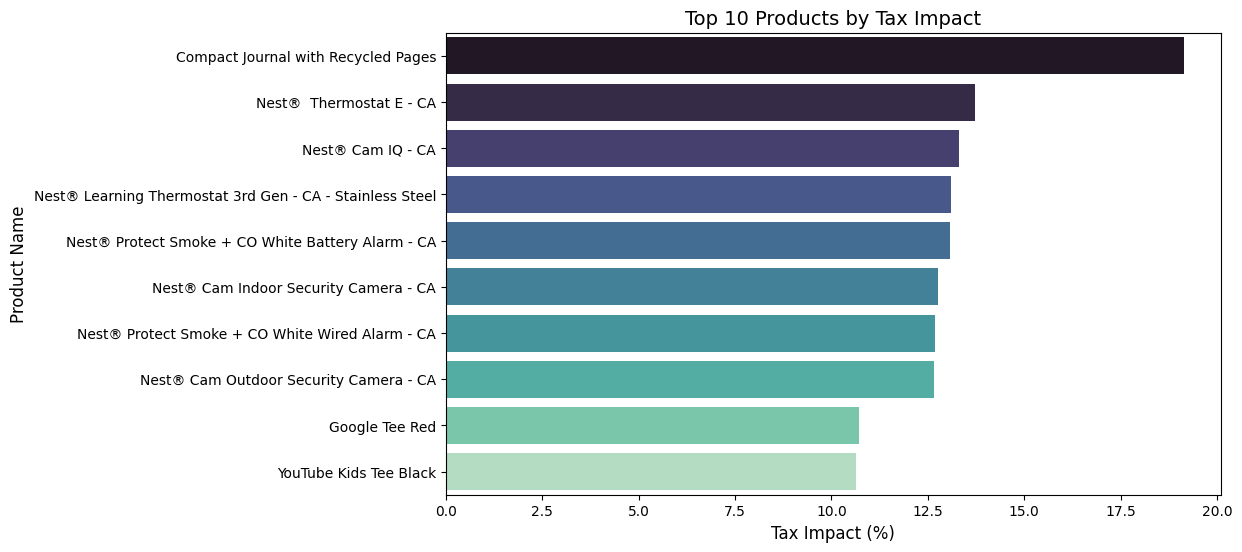

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Tax_Percentage",
    y="ProductName",
    data=high_tax_products,
    palette="mako",
    hue="ProductName",
    dodge=False
)
plt.legend([],[], frameon=False)
plt.xlabel("Tax Impact (%)", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.title("Top 10 Products by Tax Impact", fontsize=14)
plt.show()


#6. Revenue by Day of the Week

In [34]:
# Extract day of the week
online_transactions_df["DayOfWeek"] = online_transactions_df["TransactionDate"].dt.day_name()

# Revenue by day of the week
revenue_by_day = (
    online_transactions_df.groupby("DayOfWeek")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

# Print results
print("Revenue by Day of the Week:")
print(revenue_by_day)


Revenue by Day of the Week:
   DayOfWeek     Revenue
0  Wednesday  3325543.71
1    Tuesday  2985875.07
2     Friday  2331321.46
3     Monday  2243880.55
4   Thursday  2174494.02
5   Saturday   922653.76
6     Sunday   920174.67


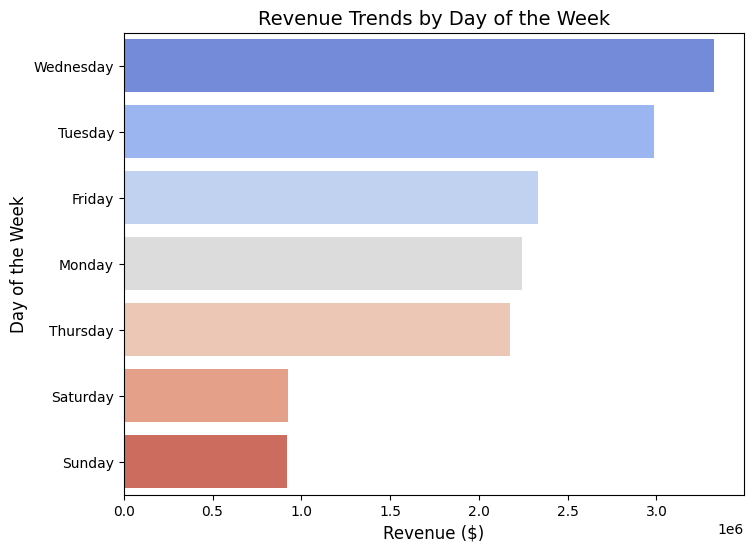

In [35]:
plt.figure(figsize=(8, 6))
sns.barplot(
    x="Revenue",
    y="DayOfWeek",
    data=revenue_by_day,
    palette="coolwarm",
    hue="DayOfWeek",
    dodge=False
)
plt.legend([],[], frameon=False)
plt.xlabel("Revenue ($)", fontsize=12)
plt.ylabel("Day of the Week", fontsize=12)
plt.title("Revenue Trends by Day of the Week", fontsize=14)
plt.show()


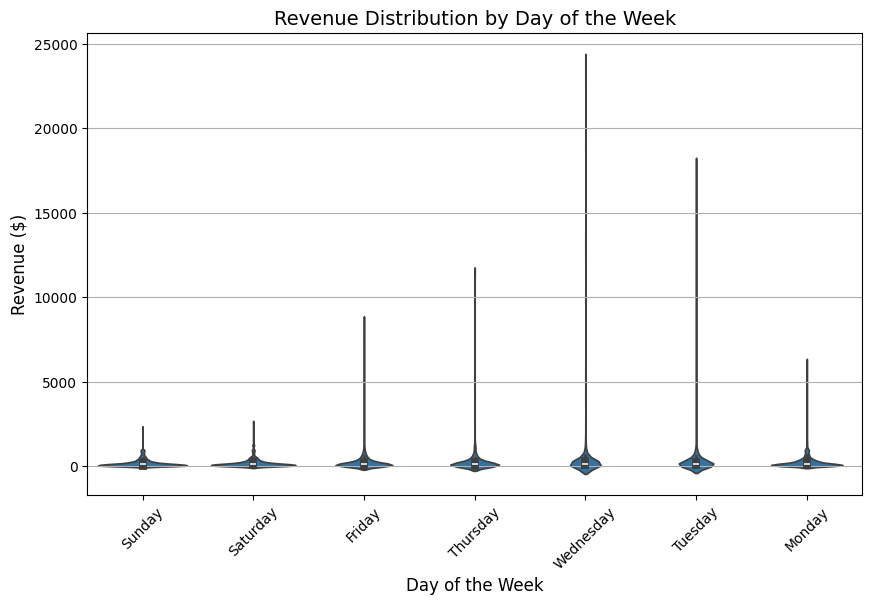

In [36]:
plt.figure(figsize=(10, 6))
sns.violinplot(
    x="DayOfWeek",
    y="Revenue",
    data=online_transactions_df,

)
plt.xlabel("Day of the Week", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)
plt.title("Revenue Distribution by Day of the Week", fontsize=14)
plt.grid(axis="y")
plt.xticks(rotation=45)
plt.show()


Analysis of Item Popularity

In [37]:
#Analysis of Sales Volumes and top 10 most popular items sold
onlineQtySum = online.groupby(["ProductSKU","ProductName"])["Qty"].sum().reset_index()

onlineTotalQty = online["Qty"].sum()

top10p = onlineQtySum.sort_values(by = "Qty", ascending = False)[:10]["Qty"].sum()/onlineTotalQty
print ("Top 10 products make up", top10p*100, "% of sales volume")
top50p = onlineQtySum.sort_values(by = "Qty", ascending = False)[:50]["Qty"].sum()/onlineTotalQty
print ("Top 50 products make up", top50p*100, "% of sales volume")

Top 10 products make up 28.85969410596404 % of sales volume
Top 50 products make up 68.68574637981979 % of sales volume


In [38]:
#Shows top 10 most popular items
top10Qty = onlineQtySum.sort_values(by = "Qty", ascending = False)[:10]
top10Qty

,ProductSKU,ProductName,Qty
945,GGOEGGOA017399,Maze Pen,16234
890,GGOEGDHC018299,Google 22 oz Water Bottle,9728
861,GGOEGBMJ013399,Sport Bag,7321
1001,GGOEGOLC014299,Google Metallic Notebook Set,6496
935,GGOEGFKQ020399,Google Laptop and Cell Phone Stickers,5847
938,GGOEGFSR022099,Google Kick Ball,5549
1015,GGOENEBQ078999,Nest® Cam Outdoor Security Camera - USA,5206
939,GGOEGFYQ016599,Foam Can and Bottle Cooler,5098
973,GGOEGOAQ012899,Ballpoint LED Light Pen,4861
1013,GGOENEBJ079499,Nest® Learning Thermostat 3rd Gen-USA - Stainl...,4570


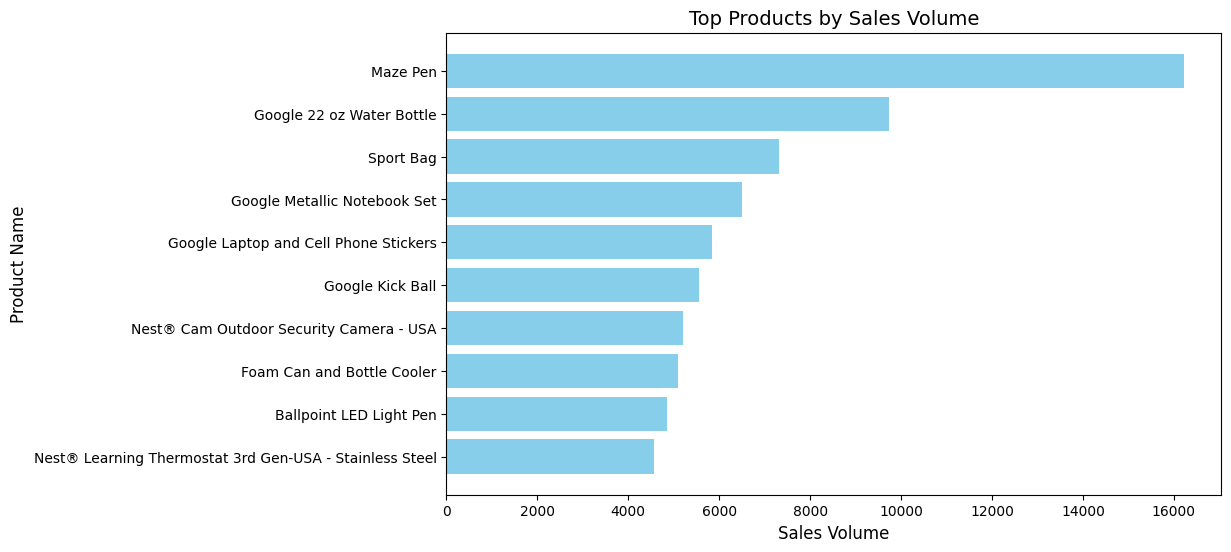

In [39]:
# Visualization for Top Products by Sales Volume
plt.figure(figsize=(10, 6))
plt.barh(top10Qty["ProductName"], top10Qty["Qty"], color="skyblue")
plt.xlabel("Sales Volume", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.title("Top Products by Sales Volume", fontsize=14)
plt.gca().invert_yaxis()
plt.show()